In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('Book1.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
# IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np

In [4]:
# DEFINE COLUMN NAMES FOR THE DATASETS
columns = [ 'Movie Name' , 'Genre' , 'Description']
column = ['Movie Name' , 'Description']
#Since they will be displayed in the graph and tables

In [5]:
# READ THE TRAINING DATA FROM THE CSV FILE
df_train = pd.read_csv('Book1.csv', engine= 'python' )


# DISPLAY THE FIRST FEW ROWS OF THE TRAINING DATASET
df_train.head()

,Movie Name,Genre,Description
0,Shershah,War,Story of a soldier on duty.
1,The Boys,Action,A group of vigilantes set out to take down cor...
2,IF,Family,A young girl who goes through a difficult expe...
3,Holes,Comedy,A young girl who goes through a difficult expe...
4,Game Of Thrones,Action,Nine noble families fight for control over the...


In [6]:
# READ THE TEST DATA FROM FILE.
df_test = pd.read_csv('Book1.csv', engine= 'python')

# DISPLAY THE FIRST FEW ROWS OF THE TEST DATASET
df_test.head()

,Movie Name,Genre,Description
0,Shershah,War,Story of a soldier on duty.
1,The Boys,Action,A group of vigilantes set out to take down cor...
2,IF,Family,A young girl who goes through a difficult expe...
3,Holes,Comedy,A young girl who goes through a difficult expe...
4,Game Of Thrones,Action,Nine noble families fight for control over the...


In [7]:
# CONVERT THE 'DESCRIPTION' COLUMN TO LOWERCASE IN BOTH TRAINING AND TEST DATASETS
df_train.loc[:,'Description'] = df_train['Description'].astype(str).str.lower()
df_test.loc[:,'Description'] = df_test['Description'].astype(str).str.lower()

In [8]:
# DISPLAY INFORMATION ABOUT THE TRAINING DATASET
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Movie Name                12 non-null     object
 1   Genre                     12 non-null     object
 2   Description               12 non-null     object
dtypes: object(3)
memory usage: 420.0+ bytes
None


In [9]:
# DISPLAY INFORMATION ABOUT THE TEST DATASET
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Movie Name                12 non-null     object
 1   Genre                     12 non-null     object
 2   Description               12 non-null     object
dtypes: object(3)
memory usage: 420.0+ bytes
None


In [10]:
# DISPLAY THE SHAPE (NUMBER OF ROWS AND COLUMNS) OF THE TRAINING DATASET
print(df_train.shape)

(12, 3)


In [11]:
#DISPLAY THE SHAPE (NUMBER OF ROWS AND COLUMNS) OF THE TEST DATASET
print(df_test.shape)

(12, 3)


In [12]:
# CHECK FOR DUPLICATE ROWS IN THE TRAINING DATASET
print("TRAINING DUPLICATES:", df_train.duplicated().sum())

TRAINING DUPLICATES: 0


In [13]:
# CHECK FOR DUPLICATE ROWS IN THE TEST DATASET
print("TEST DUPLICATES:", df_test.duplicated().sum())

TEST DUPLICATES: 0


In [14]:
# DROP DUPLICATE ROWS FROM THE TRAINING DATASET
df_train = df_train.drop_duplicates(keep ='first')

# DROP DUPLICATE ROWS FROM THE TEST DATASET
df_test = df_test.drop_duplicates(keep = 'first')

In [15]:
# VERIFY NO DUPLICATES REMAIN IN THE TRAINING DATASET
print("TRAINING DUPLICATES AFTER REMOVAL:", df_train.duplicated().sum())

# VERIFY NO DUPLICATES REMAIN IN THE TEST DATASET
print("TEST DUPLICATES AFTER REMOVAL:", df_test.duplicated().sum())

TRAINING DUPLICATES AFTER REMOVAL: 0
TEST DUPLICATES AFTER REMOVAL: 0


In [16]:
# VERIFY NO DUPLICATES REMAIN IN THE TRAINING DATASET
print("TRAINING DUPLICATES AFTER REMOVAL:", df_train.duplicated().sum())

# VERIFY NO DUPLICATES REMAIN IN THE TEST DATASET
print("TEST DUPLICATES AFTER REMOVAL:", df_test.duplicated().sum())

TRAINING DUPLICATES AFTER REMOVAL: 0
TEST DUPLICATES AFTER REMOVAL: 0


In [17]:
# DISPLAY THE SHAPE OF THE TRAINING DATASET AFTER REMOVING DUPLICATES
print(df_train.shape)

# DISPLAY THE SHAPE OF THE TEST DATASET AFTER REMOVING DUPLICATES
print(df_test.shape)

(12, 3)
(12, 3)


In [18]:
# SEPARATE FEATURES AND LABELS FOR TRAINING AND TEST DATASETS
x_train_full = df_train['Description']
y_train_full = df_train['Genre']

x_test = df_test['Description']
y_test = df_test['Genre']

In [19]:
# DISPLAY THE SHAPES OF THE FEATURE AND LABEL ARRAYS FOR THE TRAINING DATASET
print(x_train_full.shape)
print(y_train_full.shape)

(12,)
(12,)


In [20]:
# DISPLAY THE SHAPES OF THE FEATURE AND LABEL ARRAYS FOR THE TEST DATASET
print(x_test.shape)
print(y_test.shape)

(12,)
(12,)


C:\Users\Dell\AppData\Local\Temp\ipykernel_28460\3755845081.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre' , data=df_train , order=df_train['Genre'].value_counts().index ,palette='viridis')


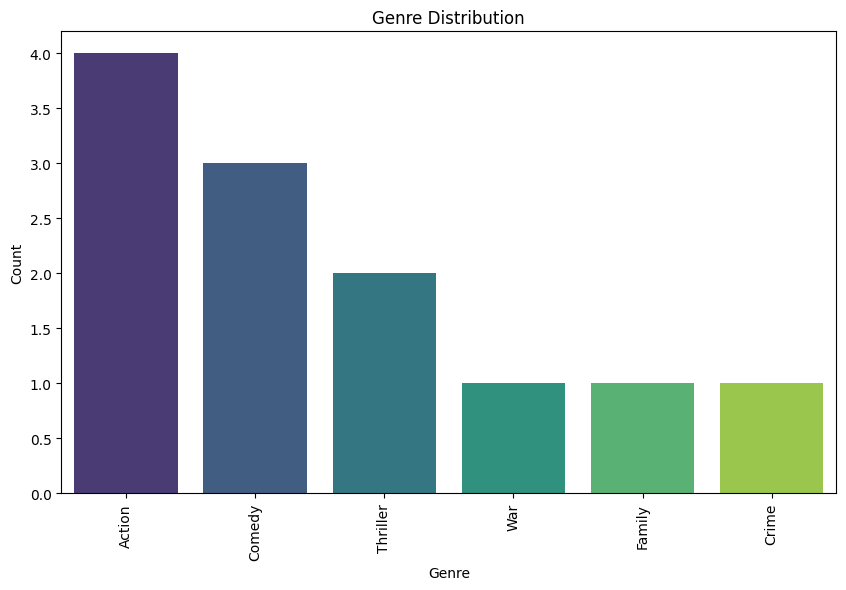

In [26]:
# IMPORTING VISUALIZATION LIBRARIES
import seaborn as sns
import matplotlib.pyplot as plt

# PLOT THE DISTRIBUTION OF GENRES IN THE TRAINING DATASET
plt.figure(figsize=(10,6))
sns.countplot(x='Genre' , data=df_train , order=df_train['Genre'].value_counts().index ,palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [27]:
# IMPORTING train_test_split FROM sklearn TO SPLIT THE DATA
from sklearn.model_selection import train_test_split

# SPLIT THE TRAINING DATA INTO TRAINING AND VALIDATION SETS
X_train , X_val , Y_train , Y_val = train_test_split(x_train_full , y_train_full , test_size=0.2 , random_state=42)

In [28]:
# DISPLAY THE SHAPES OF THE TRAINING , VALIDATION AND TEST FEATURE SETS
print(X_train.shape)
print(X_val.shape)
print(x_test.shape)

print('\n')

# DISPLAY THE SHAPES OF THE TRAINING , VALIDATION AND TEST LABEL SETS
print(Y_train.shape)
print(Y_val.shape)
print(y_test.shape)

(9,)
(3,)
(12,)


(9,)
(3,)
(12,)


In [29]:
# IMPORT TfidfVectorizer FROM sklearn FOR FEATURE EXTRACTION
from sklearn.feature_extraction.text import TfidfVectorizer

# INITIALIZE TF-IDF VECTORIZER
tfidf = TfidfVectorizer(stop_words ='english' , max_features=5000)

# FIT AND TRANSFORM THE TRAINING FEATURES, AND TRANSFORM THE VALIDATION AND TEST FEATURES
X_train_vec = tfidf.fit_transform(X_train)
X_val_vec = tfidf.transform(X_val)
X_test_vec = tfidf.transform(x_test)

In [30]:
# IMPORT MULTINOMIAL NAIVE BAYES CLASSIFIER FROM sklearn
from sklearn.naive_bayes import MultinomialNB

# TRAIN THE MULTINOMIAL NAIVE BAYES CLASSIFIER
nb = MultinomialNB()
nb.fit(X_train_vec, Y_train)

MultinomialNB()

In [31]:
# MAKE PREDICTIONS ON THE VALIDATION SET
y_pred_val = nb.predict(X_val_vec)

In [33]:
 #IMPORT EVALUATION METRICS FROM sklearn
from sklearn.metrics import accuracy_score, classification_report

# EVALUATE THE MODEL ON THE VALIDATION SET
accuracy_val = accuracy_score(Y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)
print("Validation Classification Report:")
print(classification_report(Y_val, y_pred_val, zero_division=0))

Validation Accuracy: 0.3333333333333333
Validation Classification Report:
              precision    recall  f1-score   support

      Action       0.33      1.00      0.50         1
      Comedy       0.00      0.00      0.00         1
         War       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



In [34]:
# MAKE PREDICTIONS ON THE TEST SET
y_pred_test = nb.predict(X_test_vec)

# EVALUATE THE MODEL ON THE TEST SET
accuracy_test = accuracy_score(y_test, y_pred_test)
print("\nTest Accuracy:", accuracy_test)
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test, zero_division=0))


Test Accuracy: 0.6666666666666666
Test Classification Report:
              precision    recall  f1-score   support

      Action       0.57      1.00      0.73         4
      Comedy       0.67      0.67      0.67         3
       Crime       0.00      0.00      0.00         1
      Family       0.00      0.00      0.00         1
    Thriller       1.00      1.00      1.00         2
         War       0.00      0.00      0.00         1

    accuracy                           0.67        12
   macro avg       0.37      0.44      0.40        12
weighted avg       0.52      0.67      0.58        12

